In [1]:
import importlib
import numpy as np

from constants import *
import utils
importlib.reload(utils)

<module 'utils' from '/mnt/cb8c2a81-32e7-40bc-af74-0c1386cda683/programowanie/pipelon/Classifier-Builder/utils.py'>

In [ ]:
x_train, y_train = utils.new_load_data('training')
x_test, y_test = utils.new_load_data('testing')
x_val, y_val = utils.new_load_data('validation')

# x_train, y_train = x_train[:10000], y_train[:10000]
# x_test, y_test = x_test[:3000], y_test[:3000]

x_train.shape, y_test.shape, y_val.shape 

((55072, 20), (14968, 2), (10960, 2))

In [37]:
print(f"Classes: {STATES}")
print(f"Class distribution for train: {np.unique(y_train, return_counts=True)}")
print(f"Class distribution for test: {np.unique(y_test, return_counts=True)}")
print(f"Class distribution for valid: {np.unique(y_val, return_counts=True)}")

Classes: ['boredom', 'flow']
Class distribution for train: (array([0, 1], dtype=int32), array([55072, 55072]))
Class distribution for test: (array([0, 1], dtype=int32), array([14968, 14968]))
Class distribution for valid: (array([0, 1], dtype=int32), array([10960, 10960]))


In [ ]:
import tensorflow as tf

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='../models/phase_2/phase_2_model.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.6,
    patience=3,
    min_lr=1e-6,
    verbose=1
)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu6', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(len(STATES), activation='softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
  x_train, 
  y_train, 
  epochs=15, 
  verbose=1,
  validation_data=(x_test, y_test),
  callbacks=[checkpoint_callback, lr_scheduler]
)


2024-11-30 01:11:14.226303: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-30 01:11:14.249256: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-30 01:11:14.258369: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-30 01:11:14.278433: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/jakubner/anaconda3/lib/python

Epoch 1/15


I0000 00:00:1732925476.660571   22965 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732925476.664056   22965 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732925476.668789   22965 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732925476.674886   22965 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

  71/1721 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5216 - loss: 1.3902

I0000 00:00:1732925479.217145   23017 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1703/1721 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6158 - loss: 0.7004
Epoch 1: val_loss improved from inf to 0.57630, saving model to ../models/phase_2/phase_2_model.keras
1721/1721 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6163 - loss: 0.6994 - val_accuracy: 0.6946 - val_loss: 0.5763 - learning_rate: 0.0010
Epoch 2/15
1716/1721 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7261 - loss: 0.5321
Epoch 2: val_loss improved from 0.57630 to 0.51112, saving model to ../models/phase_2/phase_2_model.keras
1721/1721 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7261 - loss: 0.5320 - val_accuracy: 0.7415 - val_loss: 0.5111 - learning_rate: 0.0010
Epoch 3/15
1694/1721 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7629 - loss: 0.4744
Epoch 3: val_loss improved from 0.51112 to 0.47525, saving model to ../models/phase_2/phase_2_model.keras
1721/1721 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7630 - loss: 0.4742 - val_accuracy: 0.7547 - val_loss: 0.4753 - learning_rate: 0.0010
Epoc

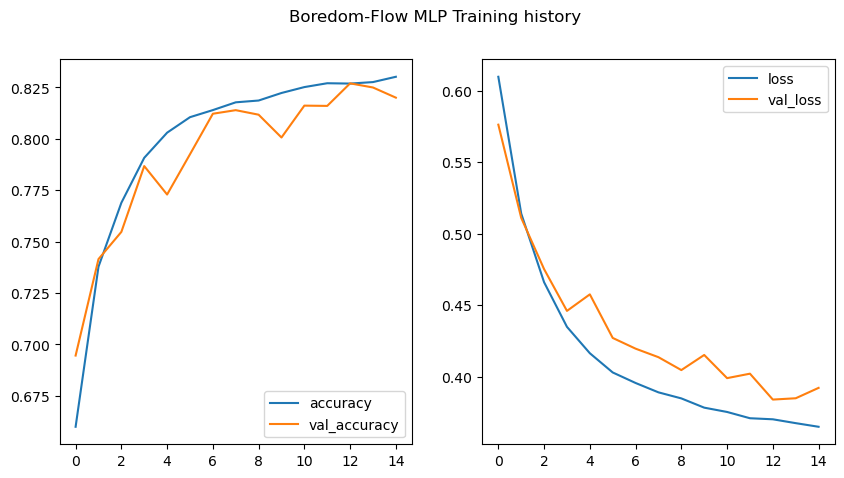

In [12]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  
fig.suptitle('Boredom-Flow MLP Training history')

axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label='val_accuracy')
axs[0].legend()

axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label='val_loss')
axs[1].legend()
plt.show()

In [11]:

from sklearn.metrics import classification_report, confusion_matrix
best_model = tf.keras.models.load_model('../models/phase_2/phase_2_model.keras')
y_pred = best_model.predict(x_test).argmax(axis=1)

true_y = y_test.argmax(axis=1)
utils.present_confusion_matrix(confusion_matrix(true_y, y_pred))
utils.present_metrics(classification_report(true_y, y_pred, target_names=STATES, output_dict=True))

468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
+-----------------+--------------------+-----------------+
|                 | Predicted: boredom | Predicted: flow |
+-----------------+--------------------+-----------------+
| Actual: boredom |        6047        |      1413       |
|  Actual: flow   |        1177        |      6331       |
+-----------------+--------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|   boredom    |   0.837   | 0.811  |  0.824   | 7460.0  |
|     flow     |   0.818   | 0.843  |   0.83   | 7508.0  |
|   accuracy   |   0.827   | 0.827  |  0.827   |  0.827  |
|  macro avg   |   0.827   | 0.827  |  0.827   | 14968.0 |
| weighted avg |   0.827   | 0.827  |  0.827   | 14968.0 |
+--------------+-----------+--------+----------+---------+


In [35]:
MODEL_NAME = 'boredom-flow-30-11'

best_model.export(f'./tmp-{MODEL_NAME}')

!python -m tf2onnx.convert \
        --saved-model f"tmp-{MODEL_NAME}" \
        --output f"./exported_models/{MODEL_NAME}" \
        --opset 9 
!rm -r f"tmp-{MODEL_NAME}"

INFO:tensorflow:Assets written to: ./tmp-boredom-flow-30-11/assets


INFO:tensorflow:Assets written to: ./tmp-boredom-flow-30-11/assets


Saved artifact at './tmp-boredom-flow-30-11'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 20), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  126038704751056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  126038704750864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  126038704754320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  126038704755088: TensorSpec(shape=(), dtype=tf.resource, name=None)
2024-11-30 01:56:30.317393: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-30 01:56:30.342200: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-30 01:56:

In [ ]:
example = x_test[0].reshape(1, -1)
example.astype(np.float32).shape

(1, 20)

In [ ]:

import numpy as np
import onnxruntime as rt

session = rt.InferenceSession("./output/mnist1.onnx")
input_name = session.get_inputs()[0].name
label_name = [o.name for o in session.get_outputs()]
 
print(f'input={input_name}, output={label_name}')

print(f'onnx pred: {session.run(label_name, {input_name: example.astype(np.float32)})}')


input=dense_input, output=['dense_1']
onnx pred: [array([[0.8251859 , 0.17481413]], dtype=float32)]


2024-11-21 23:28:59.210450126 [W:onnxruntime:, graph.cc:1296 Graph] Initializer StatefulPartitionedCall/sequential/dense_1/MatMul/ReadVariableOp:0 appears in graph inputs and will not be treated as constant value/weight. This may prevent some of the graph optimizations, like const folding. Move it out of graph inputs if there is no need to override it, by either re-generating the model with latest exporter/converter or with the tool onnxruntime/tools/python/remove_initializer_from_input.py.
2024-11-21 23:28:59.210477707 [W:onnxruntime:, graph.cc:1296 Graph] Initializer StatefulPartitionedCall/sequential/dense_1/BiasAdd/ReadVariableOp:0 appears in graph inputs and will not be treated as constant value/weight. This may prevent some of the graph optimizations, like const folding. Move it out of graph inputs if there is no need to override it, by either re-generating the model with latest exporter/converter or with the tool onnxruntime/tools/python/remove_initializer_from_input.py.
2024-11

In [ ]:
print('accuracy:', svm.score(x_test, y_test))

from sklearn.metrics import classification_report, confusion_matrix
y_pred = svm.predict(x_test)

utils.present_confusion_matrix(confusion_matrix(y_test, y_pred))
utils.present_metrics(classification_report(y_test, y_pred, target_names=STATES, output_dict=True))

accuracy: 0.7133333333333334
Confusion Matrix:
+-----------------+--------------------+-----------------+
|                 | Predicted: boredom | Predicted: flow |
+-----------------+--------------------+-----------------+
| Actual: boredom |        1397        |       95        |
|  Actual: flow   |        765         |       743       |
+-----------------+--------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|   boredom    |   0.646   | 0.936  |  0.765   | 1492.0  |
|     flow     |   0.887   | 0.493  |  0.633   | 1508.0  |
|   accuracy   |   0.713   | 0.713  |  0.713   |  0.713  |
|  macro avg   |   0.766   | 0.715  |  0.699   | 3000.0  |
| weighted avg |   0.767   | 0.713  |  0.699   | 3000.0  |
+--------------+-----------+--------+----------+---------+
